## INFO834 TP2     


In [129]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.compute as pc
import matplotlib.pyplot as plt

In [130]:

file_path_1 = './data/academies_virgule.csv'

file_path_2 = './data/villes_virgule.csv'

dfAcademies = pd.read_csv(file_path_1)
dfVilles = pd.read_csv(file_path_2)

print(dfAcademies)
print(dfVilles)


                         academie                              wikipedia  \
0                Académie de Lyon        fr:Académie de Lyon (éducation)   
1               Académie d'Amiens       fr:Académie d'Amiens (éducation)   
2    Académie de Clermont-Ferrand        fr:Académie de Clermont-Ferrand   
3        Académie d'Aix-Marseille            fr:Académie d'Aix-Marseille   
4        Académie d'Aix-Marseille            fr:Académie d'Aix-Marseille   
..                            ...                                    ...   
96         Académie de Versailles  fr:Académie de Versailles (éducation)   
97      Académie de la Guadeloupe           fr:Académie de la Guadeloupe   
98      Académie de la Martinique           fr:Académie de la Martinique   
99             Académie de Guyane               fr:Académie de la Guyane   
100        Académie de la Réunion              fr:Académie de La Réunion   

    vacances  dep              departement                       region  
0     Zone A 

### Question 1) 
 Quatre fonctions qui permettent de convertir les données données en paramètre d'un format vers l'autre
(en lecture et écriture) : dataframe < - > table, table < - > fichier parquet. Tester sur les données des villes
et académies.

In [131]:
tableAcademies =  pa.Table.from_pandas(dfAcademies)
tableVilles =  pa.Table.from_pandas(dfVilles)

In [132]:
print(tableAcademies)
print(tableVilles)

pyarrow.Table
academie: string
wikipedia: string
vacances: string
dep: string
departement: string
region: string
----
academie: [["Académie de Lyon","Académie d'Amiens","Académie de Clermont-Ferrand","Académie d'Aix-Marseille","Académie d'Aix-Marseille",...,"Académie de Versailles","Académie de la Guadeloupe","Académie de la Martinique","Académie de Guyane","Académie de la Réunion"]]
wikipedia: [["fr:Académie de Lyon (éducation)","fr:Académie d'Amiens (éducation)","fr:Académie de Clermont-Ferrand","fr:Académie d'Aix-Marseille","fr:Académie d'Aix-Marseille",...,"fr:Académie de Versailles (éducation)","fr:Académie de la Guadeloupe","fr:Académie de la Martinique","fr:Académie de la Guyane","fr:Académie de La Réunion"]]
vacances: [["Zone A","Zone B","Zone A","Zone B","Zone B",...,"Zone C",null,null,null,null]]
dep: [["01","02","03","04","05",...,"95","971","972","973","974"]]
departement: [["Ain","Aisne","Allier","Alpes-de-Haute-Provence","Hautes-Alpes",...,"Val-d'Oise","Guadeloupe","Marti

In [133]:
pq.write_table(tableAcademies, "./parquet/question1.parquet")

### Question 2) 
 Une fonction qui permet d’afficher le schéma d'une table. Tester sur les données villes et académies.


In [134]:
print(tableAcademies.schema)
print(tableVilles.schema)

academie: string
wikipedia: string
vacances: string
dep: string
departement: string
region: string
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 951
dep: string
nom: string
cp: string
nb_hab_2010: int64
nb_hab_1999: int64
nb_hab_2012: int64
dens: int64
surf: double
long: double
lat: double
alt_min: double
alt_max: double
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 1596


### Question 3) 
 Une fonction qui renvoie la colonne col d'une table donnée en paramètre (fonction column() ou select()).

In [135]:
def column(table, columnName):
    return pd.DataFrame(table[columnName])

column(tableAcademies, "wikipedia")
    

,0
0,fr:Académie de Lyon (éducation)
1,fr:Académie d'Amiens (éducation)
2,fr:Académie de Clermont-Ferrand
3,fr:Académie d'Aix-Marseille
4,fr:Académie d'Aix-Marseille
...,...
96,fr:Académie de Versailles (éducation)
97,fr:Académie de la Guadeloupe
98,fr:Académie de la Martinique
99,fr:Académie de la Guyane


### Question 4) 
En utilisant les fonctions compute de pyarrow, des fonctions qui renvoient des statistiques sur une
colonne de table : count, count_distinct, sum, min, max. Tester sur des colonnes de la table des villes.

In [136]:
def count_column(table, column_name):
    return pc.count(table.column(column_name))

def count_distinct_column(table, column_name):
    return pc.count_distinct(table.column(column_name))

def sum_column(table, column_name):
    return pc.sum(table.column(column_name))

def min_column(table, column_name):
    return pc.min_max(table.column(column_name))['min']

def max_column(table, column_name):
    return pc.min_max(table.column(column_name))['max']

In [137]:
print(f"Nombre d'habitants en 2010: {count_column(tableVilles, 'nb_hab_2010')} ")
print(f"Nombre distinct de codes postaux: {count_distinct_column(tableVilles, 'cp')} ")
print(f"Somme des habitants en 2010: {sum_column(tableVilles, 'nb_hab_2010')} ")
print(f"Densité minimale: {min_column(tableVilles, 'dens')} ")
print(f"Densité maximale: {max_column(tableVilles, 'dens')} ")

Nombre d'habitants en 2010: 36700 
Nombre distinct de codes postaux: 6082 
Somme des habitants en 2010: 64886015 
Densité minimale: 0 
Densité maximale: 26660 


### Question 5)
Filtrage et tri : des fonctions pour sélectionner les informations sur une ville (e.g. Annecy) et pour
sélectionner les informations sur un département (e.g. Haute-Savoie) par ordre alphabétique des villes
(fonction filter et sort).

In [138]:
def find_city(table, cityName):
    name_column = table.column('nom')
    name_series = name_column.to_pandas()
    index = name_series[name_series == cityName].index[0]
    return table.slice(index, index + 1)


find_city(tableVilles, "Ozan")

pyarrow.Table
dep: string
nom: string
cp: string
nb_hab_2010: int64
nb_hab_1999: int64
nb_hab_2012: int64
dens: int64
surf: double
long: double
lat: double
alt_min: double
alt_max: double
----
dep: [["1"]]
nom: [["Ozan"]]
cp: [["1190"]]
nb_hab_2010: [[618]]
nb_hab_1999: [[469]]
nb_hab_2012: [[500]]
dens: [[93]]
surf: [[6.6]]
long: [[4.91667]]
lat: [[46.3833]]
...

In [139]:
table = tableVilles.to_pandas()

# Sélection des informations pour le département 'Haute-Savoie'
haute_savoie_data = table[table['dep'] == '74']

# Tri par ordre alphabétique des villes
haute_savoie_data_sorted = haute_savoie_data.sort_values(by='nom')
haute_savoie_data_sorted

,dep,nom,cp,nb_hab_2010,nb_hab_1999,nb_hab_2012,dens,surf,long,lat,alt_min,alt_max
30171,74,Abondance,74360,1342,1297,1300,22,58.84,6.73333,46.2833,840.0,2420.0
30422,74,Alby-sur-Chéran,74540,2012,1631,2000,306,6.56,6.02084,45.8167,360.0,606.0
30227,74,Alex,74290,985,791,1000,57,17.02,6.23333,45.8833,516.0,1852.0
30269,74,Allinges,74200,3982,3022,3800,265,15.01,6.46667,46.3333,438.0,750.0
30249,74,Allonzier-la-Caille,74350,1637,1080,1500,170,9.62,6.11667,46.0000,471.0,882.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30158,74,Épagny,74330,3899,3233,3800,575,6.77,6.10000,45.9333,440.0,775.0
30401,74,Étercy,74150,698,630,700,153,4.55,6.00000,45.8833,337.0,593.0
30291,74,Étrembières,74100,1887,1429,1800,347,5.43,6.23333,46.1833,393.0,860.0
30216,74,Évian-les-Bains,74500,8142,7278,8100,1897,4.29,6.58333,46.3833,372.0,772.0


### Question 6)
Calculs sur plusieurs colonnes et agrégats : calcul du nombre moyen d'habitants en 2012 ; calcul du
nombre moyen d'habitants par département ; afficher le résultat pour le département 74 (fonction
TableGroupBy).

In [140]:
mean_hab_2012 = pc.mean(tableVilles.column('nb_hab_2012'))
print("Nombre moyen d'habitants en 2012:", mean_hab_2012.as_py())

grouped_by_dep = tableVilles.group_by("dep").aggregate([
    ("nb_hab_2012", "sum")
])
print("Nombre moyen d'habitants par département :\n", grouped_by_dep)

dep_74_stats = pc.filter(grouped_by_dep, pc.equal(grouped_by_dep['dep'], "74"))
print("Statistiques pour le département 74 :\n", dep_74_stats)


Nombre moyen d'habitants en 2012: 1751.080272479564
Nombre moyen d'habitants par département :
 pyarrow.Table
nb_hab_2012_sum: int64
dep: string
----
nb_hab_2012_sum: [[581700,540200,343100,158000,133900,...,394173,229040,821136,212645,6080]]
dep: [["1","2","3","4","5",...,"972","973","974","976","975"]]
Statistiques pour le département 74 :
 pyarrow.Table
nb_hab_2012_sum: int64
dep: string
----
nb_hab_2012_sum: [[716500]]
dep: [["74"]]


### Question 7)
Opérations ensemblistes jointures : afficher les zones de vacances des villes ; les villes de la zone de
vacances A ; les départements des zones de vacances A et B ; le nombre de villes par académie ;

In [141]:
dfAcademies['dep'] = dfAcademies['dep'].astype(str).str.zfill(2)
dfVilles['dep'] = dfVilles['dep'].astype(str).str.zfill(2)

In [142]:
df_joint = pd.merge(dfVilles, dfAcademies, how="left", on="dep")
df_joint

,dep,nom,cp,nb_hab_2010,nb_hab_1999,nb_hab_2012,dens,surf,long,lat,alt_min,alt_max,academie,wikipedia,vacances,departement,region
0,01,Ozan,1190,618,469,500,93,6.60,4.91667,46.38330,170.0,205.0,Académie de Lyon,fr:Académie de Lyon (éducation),Zone A,Ain,Auvergne-Rhône-Alpes
1,01,Cormoranche-sur-Saône,1290,1058,903,1000,107,9.85,4.83333,46.23330,168.0,211.0,Académie de Lyon,fr:Académie de Lyon (éducation),Zone A,Ain,Auvergne-Rhône-Alpes
2,01,Plagne,1130,129,83,100,20,6.20,5.73333,46.18330,560.0,922.0,Académie de Lyon,fr:Académie de Lyon (éducation),Zone A,Ain,Auvergne-Rhône-Alpes
3,01,Tossiat,1250,1406,1111,1400,138,10.17,5.31667,46.13330,244.0,501.0,Académie de Lyon,fr:Académie de Lyon (éducation),Zone A,Ain,Auvergne-Rhône-Alpes
4,01,Pouillat,1250,88,58,100,14,6.23,5.43333,46.33330,333.0,770.0,Académie de Lyon,fr:Académie de Lyon (éducation),Zone A,Ain,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36695,976,Sada,97640,10195,10195,10195,933,10.92,45.10470,-12.84860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36696,976,Tsingoni,97680,10454,10454,10454,300,34.76,45.10700,-12.78970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36697,971,Saint-Barthélemy,97133,8938,8938,8938,372,24.00,-62.83330,17.91670,NaN,NaN,Académie de la Guadeloupe,fr:Académie de la Guadeloupe,NaN,Guadeloupe,Guadeloupe
36698,971,Saint-Martin,97150,36979,36979,36979,695,53.20,18.09130,-63.08290,NaN,NaN,Académie de la Guadeloupe,fr:Académie de la Guadeloupe,NaN,Guadeloupe,Guadeloupe


In [143]:
print("Zones de vacances des villes : ")
print(df_joint[['nom', 'vacances']].head())


Zones de vacances des villes : 
                     nom vacances
0                   Ozan   Zone A
1  Cormoranche-sur-Saône   Zone A
2                 Plagne   Zone A
3                Tossiat   Zone A
4               Pouillat   Zone A


In [144]:
villes_zone_A = df_joint[df_joint['vacances'] == 'Zone A']
print("Villes dans la zone A : ")
print(villes_zone_A[['nom', 'vacances']])

Villes dans la zone A : 
                         nom vacances
0                       Ozan   Zone A
1      Cormoranche-sur-Saône   Zone A
2                     Plagne   Zone A
3                    Tossiat   Zone A
4                   Pouillat   Zone A
...                      ...      ...
35699   Chavannes-les-Grands   Zone A
35700             Lacollonge   Zone A
35701               Bretagne   Zone A
35702            Lepuix-Neuf   Zone A
35703            Recouvrance   Zone A

[12232 rows x 2 columns]


In [145]:
deps_zones_A_B = df_joint[df_joint['vacances'].isin(['Zone A', 'Zone B'])]
print("Villes des zones A et B : ")
print(deps_zones_A_B[['dep', 'vacances']].drop_duplicates())

Villes des zones A et B : 
      dep vacances
0      01   Zone A
419    02   Zone B
1235   03   Zone A
1555   04   Zone B
1755   05   Zone B
...    ..      ...
34150  86   Zone A
34431  87   Zone A
34632  88   Zone B
35147  89   Zone A
35602  90   Zone A

[72 rows x 2 columns]


In [146]:
villes_par_academie = df_joint.groupby('academie').size()
print("Nombre de villes par académie : ")
print(villes_par_academie)

Nombre de villes par académie : 
academie
Académie d'Aix-Marseille         647
Académie d'Amiens               2291
Académie d'Orléans-Tours        1842
Académie de Besançon            1785
Académie de Bordeaux            2296
Académie de Caen                1812
Académie de Clermont-Ferrand    1310
Académie de Corse                360
Académie de Créteil              601
Académie de Dijon               2046
Académie de Grenoble            1840
Académie de Guyane                22
Académie de Lille               1545
Académie de Limoges              747
Académie de Lyon                 746
Académie de Montpellier         1545
Académie de Nancy-Metz          2339
Académie de Nantes              1502
Académie de Nice                 316
Académie de Paris                  1
Académie de Poitiers            1462
Académie de Reims               1949
Académie de Rennes              1270
Académie de Rouen               1420
Académie de Strasbourg           904
Académie de Toulouse            3

### Question 8)
Affichage avec matplotlib : e.g. histogramme de la distribution du nombre de villes par académie.

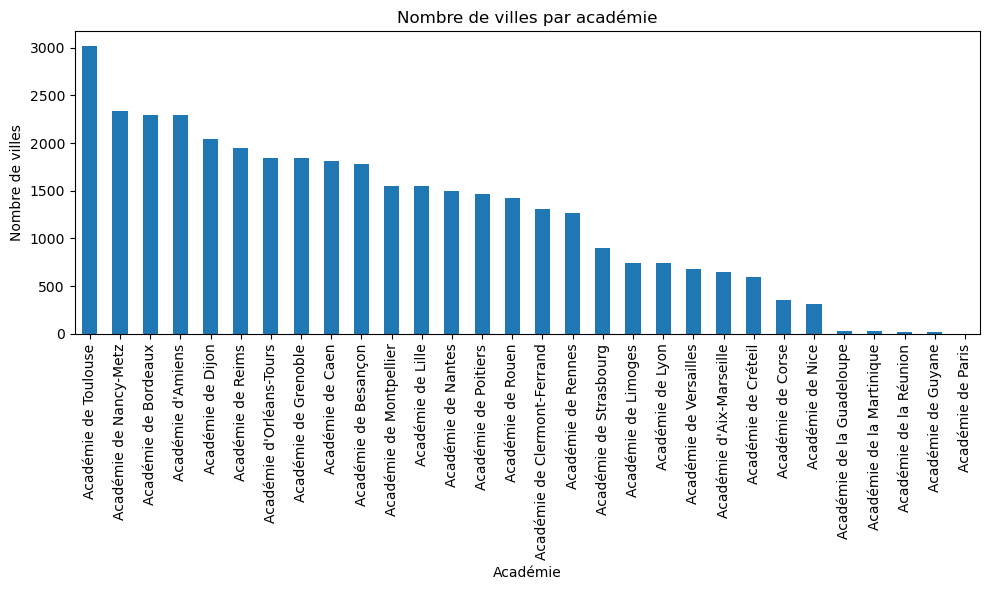

In [147]:
villes_par_academie = df_joint['academie'].value_counts()

plt.figure(figsize=(10,6))
villes_par_academie.plot(kind='bar')
plt.title('Nombre de villes par académie')
plt.xlabel('Académie')
plt.ylabel('Nombre de villes')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
df_merged = df_joint.head(200)

root_dir = "parquet/dataset_parquet"
compression_types = ['brotli', 'gzip', 'zstd', 'lz4', 'none']

for compression in compression_types:
    for academie, group_acad in df_merged.groupby('academie'):
        academie_dir = os.path.join(root_dir, compression, academie)
        for departement, group_dep in group_acad.groupby('dep'):
            dep_dir = os.path.join(academie_dir, departement)
            os.makedirs(dep_dir, exist_ok=True)
            for ville, group_ville in group_dep.groupby('nom'):
                file_path = os.path.join(dep_dir, f"{ville}.parquet")
                table = pa.Table.from_pandas(group_ville)
                pq.write_table(table, file_path, compression=compression)

In [ ]:
for compression in compression_types:
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(os.path.join(root_dir, compression)):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    print(f"Total size for {compression}: {total_size} bytes")